#### lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In this case, we are operating on the image edges (the output from Canny) and the output from HoughLinesP will be lines, which will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments detected by the transform operation. The other parameters define just what kind of line segments we're looking for.

First off, rho and theta are the distance and angular resolution of our grid in Hough space. Remember that, in Hough space, we have a grid laid out along the (Θ, ρ) axis. You need to specify rho in units of pixels and theta in units of radians.

So, what are reasonable values? Well, rho takes a minimum value of 1, and a reasonable starting place for theta is 1 degree (pi/180 in radians). Scale these values up to be more flexible in your definition of what constitutes a line.

The threshold parameter specifies the minimum number of votes (intersections in a given grid cell) a candidate line needs to have to make it into the output. The empty np.array([]) is just a placeholder, no need to change it. min_line_length is the minimum length of a line (in pixels) that you will accept in the output, and max_line_gap is the maximum distance (again, in pixels) between segments that you will allow to be connected into a single line. You can then iterate through your output lines and draw them onto the image to see what you got!

In [206]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [207]:
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [208]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [209]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [210]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = 1*np.pi/180
threshold = 270
min_line_length = 60
max_line_gap = 20
line_image = np.copy(image)*0 #creating a blank to draw lines on

In [211]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [212]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [213]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

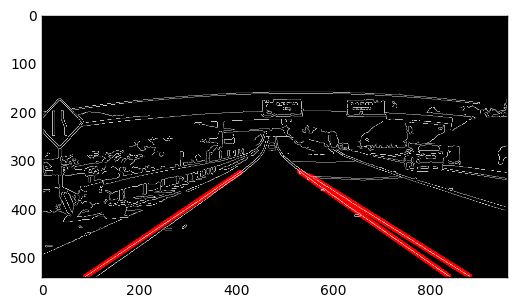

In [214]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
plt.show()